<a href="https://colab.research.google.com/github/cameronbrown100/map4/blob/master/drug_solvent_chemical_space_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup environment

https://xinhaoli74.github.io/posts/2020/05/TMAP/

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:35
🔁 Restarting kernel...


In [1]:
!conda install -c rdkit rdkit
!conda install -c tmap tmap

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.78.0               |   py37h48bf904_0         356 KB  conda-forge
    boost-cpp-1.78.0           |       h75c5d50_1        17.1 MB  conda-forge
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    cairo-1.16.0               |    ha61ee94_1014         1.5 MB  conda-forge
  

In [2]:
import pandas as pd
import tmap
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import PandasTools
from matplotlib import pyplot as plt

# Produce clean cannonical systems list

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('../content/drive/MyDrive/drugbank_solvent_fingerprint.csv')
df

,drugbank_id,drug_name,drug_group,drug_smile,ccs_study,solvent_name,solvent_class,solvent_smile
0,DB00006,Bivalirudin,approved; investigational,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,no,acetonitrile,2,CC#N
1,DB00006,Bivalirudin,approved; investigational,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,no,chlorobenzene,2,Clc1ccccc1
2,DB00006,Bivalirudin,approved; investigational,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,no,chloroform,2,ClC(Cl)Cl
3,DB00006,Bivalirudin,approved; investigational,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,no,cumene,2,CC(C)c1ccccc1
4,DB00006,Bivalirudin,approved; investigational,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,no,cyclohexane,2,C1CCCCC1
...,...,...,...,...,...,...,...,...
149795,DB16022,Thenyldiamine,approved; experimental,CN(C)CCN(CC1=CSC=C1)C1=CC=CC=N1,no,1-propanol,3,CCCO
149796,DB16022,Thenyldiamine,approved; experimental,CN(C)CCN(CC1=CSC=C1)C1=CC=CC=N1,no,2-propanol,3,CC(C)O
149797,DB16022,Thenyldiamine,approved; experimental,CN(C)CCN(CC1=CSC=C1)C1=CC=CC=N1,no,propyl acetate,3,CCCOC(C)=O
149798,DB16022,Thenyldiamine,approved; experimental,CN(C)CCN(CC1=CSC=C1)C1=CC=CC=N1,no,triethylamine,3,CCN(CC)CC


In [9]:
solutes = df.drug_name.unique()
solvents = df.solvent_name.unique()

In [8]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

In [10]:
solute_smiles = []
solvent_smiles = []

identifiers  = solvents
for ids in identifiers :
    solvent_smiles.append(CIRconvert(ids))

identifiers  = solutes
for ids in identifiers :
    solute_smiles.append(CIRconvert(ids))

In [13]:
solutes_df = pd.DataFrame({'solute' : solutes, 'solute_smile' : solute_smiles})
solutes_df  = solutes_df[solutes_df.solute_smile != 'Did not work']
solutes_df

,solute,solute_smile
0,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...
1,Leuprolide,CCNC(=O)C1CCCN1C(=O)C(CCCN=C(N)N)NC(=O)C(CC(C)...
2,Goserelin,CC(C)CC(NC(=O)C(COC(C)(C)C)NC(=O)C(Cc1ccc(O)cc...
3,Gramicidin D,CC(C)C[C@@H](NC(=O)[C@H](C)NC(=O)CNC(=O)[C@@H]...
4,Desmopressin,NC(=O)CCC1NC(=O)C(Cc2ccccc2)NC(=O)C(Cc3ccc(O)c...
...,...,...
2668,Anethole,COc1ccc(C=CC)cc1
2669,Ammonium carbonate,[NH4+].[NH4+].[O-]C([O-])=O
2670,Ferric glycerophosphate,[Fe++].[Fe++].OCCC(CCO)O[P]([O-])([O-])=O.OCC(...
2671,Sodium camphorsulfonate,[Na+].CC1(C)C2CCC1(C[S]([O-])(=O)=O)C(=O)C2


In [14]:
solvents_df = pd.DataFrame({'solvent' : solvents, 'solvent_smile' : solvent_smiles})
solvents_df = solvents_df[solvents_df.solvent_smile != 'Did not work']
solvents_df

,solvent,solvent_smile
0,acetonitrile,CC#N
1,chlorobenzene,Clc1ccccc1
2,chloroform,ClC(Cl)Cl
3,cumene,CC(C)c1ccccc1
4,cyclohexane,C1CCCCC1
5,"1,2-dichloroethene",ClC=CCl
6,Dichloromethane,ClCCl
7,"1,2-dimethoxyethane",COCCOC
8,"n,n-dimethylacetamide",CN(C)C(C)=O
9,"n,n-dimethylformamide",CN(C)C=O


In [18]:
systems = solutes_df.merge(solvents_df, how = 'cross')
systems.to_csv('../content/drive/MyDrive/solute_solvent_systems.csv')

# Generate systems fingerprints

In [40]:
df = pd.read_csv('../content/drive/MyDrive/solute_solvent_systems.csv', index_col = 0)
df

,solute,solute_smile,solvent,solvent_smile
0,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,acetonitrile,CC#N
1,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,chlorobenzene,Clc1ccccc1
2,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,chloroform,ClC(Cl)Cl
3,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,cumene,CC(C)c1ccccc1
4,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,cyclohexane,C1CCCCC1
...,...,...,...,...
120115,Thenyldiamine,CN(C)CCN(Cc1cscc1)c2ccccn2,1-propanol,CCCO
120116,Thenyldiamine,CN(C)CCN(Cc1cscc1)c2ccccn2,2-propanol,CC(C)O
120117,Thenyldiamine,CN(C)CCN(Cc1cscc1)c2ccccn2,propyl acetate,CCCOC(C)=O
120118,Thenyldiamine,CN(C)CCN(Cc1cscc1)c2ccccn2,triethylamine,CCN(CC)CC


,solute,solute_smile,solvent,solvent_smile,solute_ROMol,solvent_ROMol
0,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,acetonitrile,CC#N,,
1,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,chlorobenzene,Clc1ccccc1,,
2,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,chloroform,ClC(Cl)Cl,,
3,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,cumene,CC(C)c1ccccc1,,
4,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,cyclohexane,C1CCCCC1,,
...,...,...,...,...,...,...
120115,Thenyldiamine,CN(C)CCN(Cc1cscc1)c2ccccn2,1-propanol,CCCO,,
120116,Thenyldiamine,CN(C)CCN(Cc1cscc1)c2ccccn2,2-propanol,CC(C)O,,
120117,Thenyldiamine,CN(C)CCN(Cc1cscc1)c2ccccn2,propyl acetate,CCCOC(C)=O,,
120118,Thenyldiamine,CN(C)CCN(Cc1cscc1)c2ccccn2,triethylamine,CCN(CC)CC,,

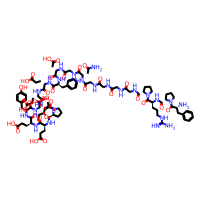
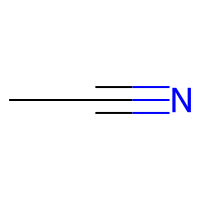
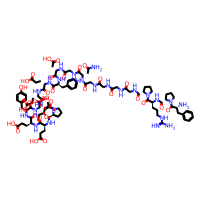
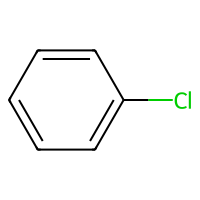
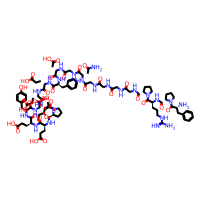
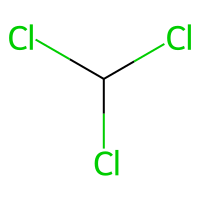
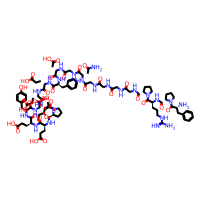
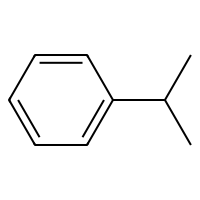
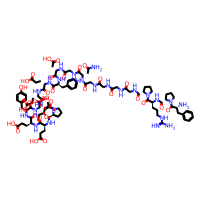
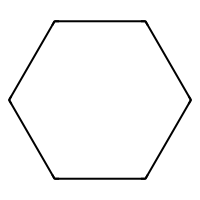
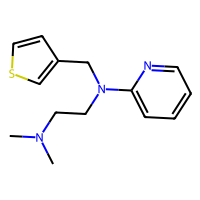
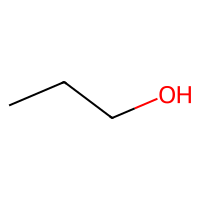
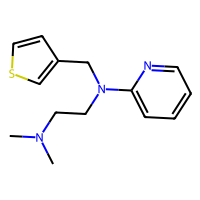
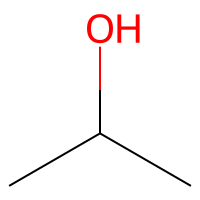
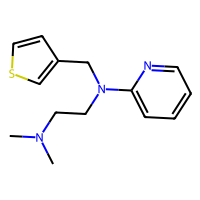
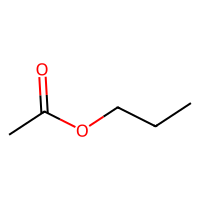
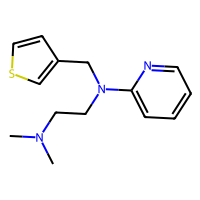
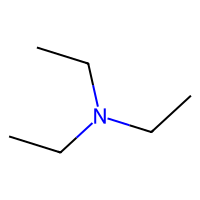
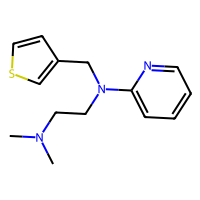
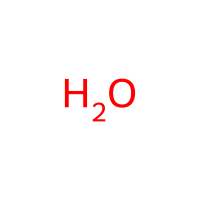

In [41]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='solute_smile',molCol='solute_ROMol')
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='solvent_smile',molCol='solvent_ROMol')
df['solute_ROMol'].replace('', np.nan, inplace=True)
df.dropna(subset=['solute_ROMol'], inplace=True)
df

In [42]:
maccs_name = [f'Bit_{i}' for i in range(167)]

solution_maccs = []

for index, row in df.iterrows():
  solute_maccs = MACCSkeys.GenMACCSKeys(row['solute_ROMol'])
  solute_maccs_list = list(solute_maccs)
  solvent_maccs = MACCSkeys.GenMACCSKeys(row['solvent_ROMol'])
  solvent_maccs_list = list(solvent_maccs)
  
  maccs_df = pd.DataFrame([solute_maccs_list, solvent_maccs_list], columns=maccs_name)
  solution_maccs.append(maccs_df.mean(axis=0))

In [44]:
maccs_name = [f'Bit_{i}' for i in range(167)]

solution_maccs = []

for index, row in df.iterrows():
  solute_maccs = MACCSkeys.GenMACCSKeys(row['solute_ROMol'])
  solute_maccs_list = list(solute_maccs)
  solvent_maccs = MACCSkeys.GenMACCSKeys(row['solvent_ROMol'])
  solvent_maccs_list = list(solvent_maccs)
  
  maccs_df = pd.DataFrame([solute_maccs_list, solvent_maccs_list], columns=maccs_name)
  solution_maccs_int = maccs_df.mean(axis=0)*10
  solution_maccs.append(tmap.VectorUint(np.array(solution_maccs_int, 'int')))

# Visualise TMAP

In [48]:
!pip install faerun

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.9 MB/s eta 0:00:00


In [45]:
# The number of permutations used by the MinHashing algorithm
perm = 166

# Initialize the LSH Forest
lf = tmap.LSHForest(perm)

# Add the Fingerprints to the LSH Forest and index
lf.batch_add(solution_maccs)
lf.index()

In [110]:
# Get the coordinates
x, y, s, t, _ = tmap.layout_from_lsh_forest(lf)

x and y are the coordinates of the nodes. s and t store the indexes of start nodes and to nodes in the MST, respectively.

In [111]:
df.solvent = pd.Categorical(df.solvent)
df['solvent_code'] = df.solvent.cat.codes

legend_labels, groups = Faerun.create_categories(df.solvent)

f = Faerun(clear_color='#222222', coords=False, view='front')

# data = {'x': x, 'y': y, 'c': df['solvent_code'], 'labels': df.solvent}

# f.add_scatter(
#     'systems', 
#     data, 
#     colormap = 'viridis',
#     point_scale = 1,
#     has_legend = True,
#     categorical = True,
#     shader = 'smoothCircle',
#     legend_labels = legend_labels,
#     title_index =1,
# )

f.add_tree("chembl_tree", {"from": s, "to": t}, point_helper="chembl", color="#222222")

f.plot('systems', template="smiles")

KeyError: ignored

In [105]:
labels_groups

[(0, '1,1,2-trichloroethene'),
 (1, '1,2-dichloroethene'),
 (2, '1,2-dimethoxyethane'),
 (3, '1,4-dioxane'),
 (4, '1-butanol'),
 (5, '1-pentanol'),
 (6, '1-propanol'),
 (7, '2-butanol'),
 (8, '2-ethoxyethanol'),
 (9, '2-methoxyethanol'),
 (10, '2-methyl-1-propanol'),
 (11, '2-propanol'),
 (12, '3-methyl-1-butanol'),
 (13, 'Dichloromethane'),
 (14, 'acetic acid'),
 (15, 'acetone'),
 (16, 'acetonitrile'),
 (17, 'anisole'),
 (18, 'butyl acetate'),
 (19, 'chlorobenzene'),
 (20, 'chloroform'),
 (21, 'cumene'),
 (22, 'cyclohexane'),
 (23, 'dimethyl sulfoxide'),
 (24, 'ethanol'),
 (25, 'ethyl acetate'),
 (26, 'ethyl ether'),
 (27, 'ethyl formate'),
 (28, 'ethyleneglycol'),
 (29, 'formamide'),
 (30, 'formic acid'),
 (31, 'heptane'),
 (32, 'hexane'),
 (33, 'isobutyl acetate'),
 (34, 'isopropyl acetate'),
 (35, 'methanol'),
 (36, 'methyl acetate'),
 (37, 'methylbutyl ketone'),
 (38, 'methylcyclohexane'),
 (39, 'methylethyl ketone'),
 (40, 'methylisobutyl ketone'),
 (41, 'n,n-dimethylacetamide'),

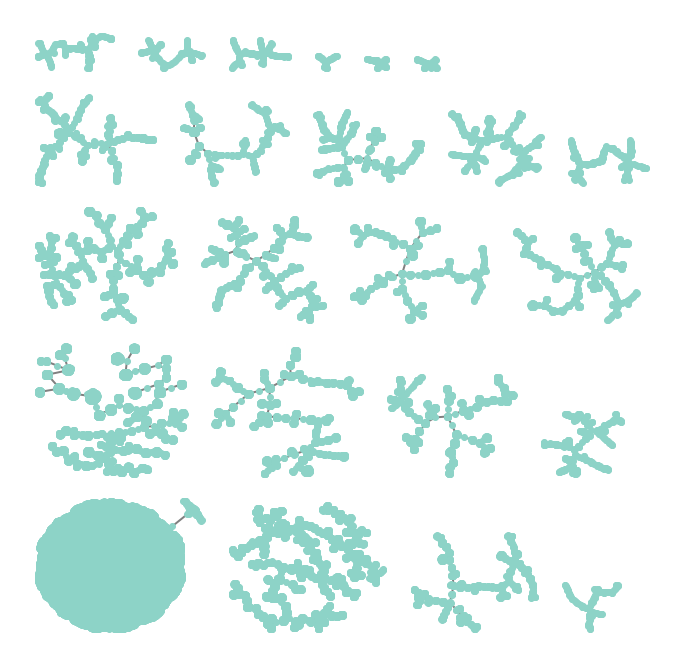

In [47]:
plt.figure(figsize = [12, 12])
plt.style.use('dark_background')

for i in range(len(s)):
    plt.plot(
        [x[s[i]], x[t[i]]],
        [y[s[i]], y[t[i]]],
        "k-",
        linewidth=2,
        alpha=1,
        zorder=1,
        color='grey'
    )

# Plot the vertices
plt.scatter(x, y, marker = 'o', zorder=2, )

# for index in range(len(x)):
#   plt.text(x[index], y[index], df.solute[index], size=12)

plt.axis('off')
#plt.colorbar()
plt.show()